<a href="https://colab.research.google.com/github/ZeroLeon/easy_classifier/blob/master/Easy_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Easy Classifier

## Setup Working Directory(Ignore this step if not using colab)

In [3]:
import os 
from pathlib import Path
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)
base_dir = '/content/gdrive/My Drive/fastai'
path = Path(base_dir +'/easy_classifier')
path.mkdir(parents=True,exist_ok=True)
os.chdir(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import torch
device_available = torch.cuda.is_available()
if not device_available:
  raise SystemError('GPU device not found')
print('GPU is on')

GPU is on


## Setup Config

In [0]:
%%capture
!pip install -r requirements.txt

In [0]:
import numpy as np
import pandas as pd
import torch
from fastai import *
from fastai.vision import *
from fastai.text import *
from fastai.callbacks import *
from pathlib import Path

import utils,helper

In [0]:
#Path of data files

path = os.getcwd()
path_data = Path(path)/'example_data'

#Setup config
config = utils.Config(
    testing=False,
    bert_model_name='bert-base-chinese', 
    max_lr=2e-5,
    epochs=1,
    bs=8, #Bantch Size
    text_cols  = ['review'],
    label_cols = ['sentiment'],
    max_seq_len=256, # Max value is 512
    num_labels = 2,  # 0:negative, 1:positive on default
    train_file = 'duoduo_train.csv',
    test_file = 'duoduo_test.csv' #None when no test data given
)

## Run sripts

In [0]:
helper.seed_everything()

In [0]:
df_train,df_test = helper.get_data(path_data,config.train_file, config.test_file)

In [32]:
learner = utils.get_learner(df_train,df_test,config)

Downloading: "https://github.com/huggingface/pytorch-pretrained-BERT/archive/master.zip" to /root/.cache/torch/hub/master.zip
100%|██████████| 382072689/382072689 [00:15<00:00, 24677344.86B/s]


## Finetune Model

In [33]:
learner.fit_one_cycle(config.epochs, max_lr=config.max_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.167206,0.152333,0.933127,04:20


In [36]:
learner.fit_one_cycle(2, max_lr=config.max_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.148118,0.157563,0.928793,03:53
1,0.106192,0.140526,0.940557,04:05


## Evaluate Results

In [0]:
true_labels = helper.get_true_labels(df_test,config.label_cols)

In [37]:
helper.print_test_metrics(true_labels,learner)

The accuracy is 93.68%, the f1_score is 95.62%


## Interpretation

In [0]:
intepret = TextClassificationInterpretation.from_learner(learner)

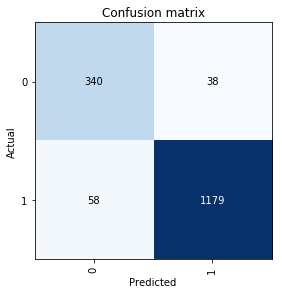

In [39]:
intepret.plot_confusion_matrix()

In [40]:
intepret.show_top_losses(3)

Text,Prediction,Actual,Loss,Probability
[CLS] 能 不 能 对 用 户 负 责 ？ ， iphone6 两 分 钟 一 闪 退 整 个 手 机 烫 死 了 [UNK] [UNK] [SEP],1,0,5.35,0.00
[CLS] 真 的 垃 圾 ， 更 新 完 还 更 新 ？ 你 们 版 本 控 制 的 是 脑 残 吗 ？ app 内 部 版 本 号 就 没 变 然 后 后 台 推 线 上 ， 一 直 强 更 真 的 服 了 ， 直 接 卸 载 。 [SEP],0,0,4.85,0.99
[CLS] 每 天 都 想 要 玩 几 局 策 略 很 好 玩 特 别 喜 欢 的 这 个 赤 潮 自 走 棋 很 不 错 的 赤 潮 自 走 棋 ！ 非 常 痴 迷 ， 组 队 建 议 弄 成 八 人 坑 吧 。 我 们 很 多 人 在 一 起 聚 会 玩 游 戏 大 家 都 玩 赤,0,1,4.85,0.01


In [42]:
learner.predict('刀塔霸业好玩的地方在于可以操作的空间太大了，缺点在于现在后期大家都阵容大同小异。但是刀塔霸业的前25个回合，是所有自走棋里面最好玩的。')

(Category 1, tensor(1), tensor([0.0018, 0.9982]))